In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_regression
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('NBA_final_stats/complete_stats.csv', index_col=0)

In [3]:
df.rename(columns={'Pts Won': 'vote_pts'}, inplace=True)
df.head()

,Season,Player,Pos,Age,Tm,G,MP,FG,FGA,FG%,...,WS,WS/48,OBPM,DBPM,BPM,VORP,First,vote_pts,Pts Max,Share
0,1979-80,Kareem Abdul-Jabbar,C,32,LAL,82,38.3,10.2,16.9,0.604,...,14.8,0.227,4.8,2.4,7.2,7.3,147.0,147.0,221,0.665
1,1979-80,Tom Abernethy,PF,25,GSW,67,18.2,2.3,4.7,0.481,...,2.0,0.080,-1.0,-0.2,-1.2,0.2,0.0,0.0,0,0.000
2,1979-80,Alvan Adams,C,25,PHO,75,28.9,6.2,11.7,0.531,...,7.0,0.155,1.7,1.9,3.6,3.1,0.0,0.0,0,0.000
3,1979-80,Tiny Archibald,PG,31,BOS,80,35.8,4.8,9.9,0.482,...,8.9,0.148,1.4,-0.3,1.1,2.3,2.0,2.0,221,0.009
4,1979-80,Dennis Awtrey,C,31,CHI,26,21.5,1.0,2.3,0.450,...,0.6,0.053,-2.3,0.9,-1.4,0.1,0.0,0.0,0,0.000


In [4]:
#create list of columns to perform perform functions on
orig_features = df.columns.values.tolist()

In [5]:
orig_features = orig_features[7:40]

In [6]:
orig_features

['FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PTS',
 'PER',
 'TS%',
 '3PAr',
 'FTr',
 'TRB%',
 'AST%',
 'STL%',
 'BLK%',
 'USG%',
 'OWS',
 'DWS',
 'WS',
 'WS/48',
 'OBPM',
 'DBPM',
 'BPM',
 'VORP']

In [7]:
x_data = df[orig_features].to_numpy()
y_data = df[['Share']].to_numpy()
y_data = y_data.reshape(y_data.shape[0], )

In [8]:
x_data

array([[ 10.2  ,  16.9  ,   0.604, ...,   2.4  ,   7.2  ,   7.3  ],
       [  2.3  ,   4.7  ,   0.481, ...,  -0.2  ,  -1.2  ,   0.2  ],
       [  6.2  ,  11.7  ,   0.531, ...,   1.9  ,   3.6  ,   3.1  ],
       ...,
       [  0.5  ,   2.   ,   0.25 , ..., -22.1  , -22.4  ,   0.   ],
       [  1.9  ,   3.3  ,   0.569, ...,  -1.5  ,  -3.2  ,  -0.1  ],
       [  3.3  ,   5.3  ,   0.613, ...,   0.8  ,   2.8  ,   1.6  ]])

In [9]:
y_data

array([0.665, 0.   , 0.   , ..., 0.   , 0.   , 0.   ])

In [10]:
regressor = RandomForestRegressor(n_estimators=200)

In [11]:
regressor.fit(x_data, y_data)

RandomForestRegressor(n_estimators=200)

In [12]:
sorted_indices = np.argsort(regressor.feature_importances_)[::-1]
sorted_indices

array([27, 32, 28, 24,  0, 16, 26, 15, 14,  1,  9, 31, 19,  8, 11, 21,  6,
       29, 30,  2, 25,  5, 17, 20, 10,  7, 13, 18, 23, 12, 22,  4,  3],
      dtype=int64)

In [13]:
for index in sorted_indices:
    print(f"{orig_features[index]}: {regressor.feature_importances_[index]}")

WS: 0.2997334029158676
VORP: 0.2727394976445321
WS/48: 0.048160052442834014
USG%: 0.028589306063419088
FG: 0.024159934924501608
PER: 0.023433115614898706
DWS: 0.02252819501109863
PTS: 0.020247531995475677
TOV: 0.02007438372767136
FGA: 0.01966653722893913
FT%: 0.018080119659102313
BPM: 0.016691680955562272
FTr: 0.014530987425463047
FTA: 0.01428986134163268
AST: 0.01265354767834139
AST%: 0.011849917681238668
eFG%: 0.011705805396595406
OBPM: 0.011328570032767151
DBPM: 0.011304035153281633
FG%: 0.010345955624081311
OWS: 0.010066844221696803
3P%: 0.009950915410234618
TS%: 0.008394324103740188
TRB%: 0.007976457814590788
TRB: 0.00736019911297717
FT: 0.007039958932526185
BLK: 0.006750818141383303
3PAr: 0.006146275144633667
BLK%: 0.0058289661019672485
STL: 0.005588728344108376
STL%: 0.004989870651037452
3PA: 0.004469213358158188
3P: 0.0033249901456422833


In [14]:
selector = SelectKBest(mutual_info_regression, k=5)

In [15]:
best_feat = selector.fit_transform(x_data, y_data)

In [16]:
sorted_indices2 = np.argsort(selector.scores_)[::-1]

In [17]:
for index in sorted_indices2:
  print(f"{orig_features[index]}: {selector.scores_[index]:.4f}")

VORP: 0.0863
WS: 0.0860
OBPM: 0.0783
PER: 0.0768
PTS: 0.0754
FT: 0.0746
BPM: 0.0737
WS/48: 0.0713
OWS: 0.0673
FG: 0.0612
FTA: 0.0600
TOV: 0.0584
FGA: 0.0579
DWS: 0.0468
USG%: 0.0438
STL: 0.0342
AST: 0.0286
eFG%: 0.0240
TRB: 0.0208
TS%: 0.0182
FG%: 0.0166
FTr: 0.0163
DBPM: 0.0136
3PAr: 0.0114
AST%: 0.0104
BLK: 0.0095
3P%: 0.0078
FT%: 0.0071
STL%: 0.0070
TRB%: 0.0039
3P: 0.0014
BLK%: 0.0012
3PA: 0.0000


In [18]:
data = df[orig_features + ['Share']]

In [19]:
import seaborn as sns

<AxesSubplot:>

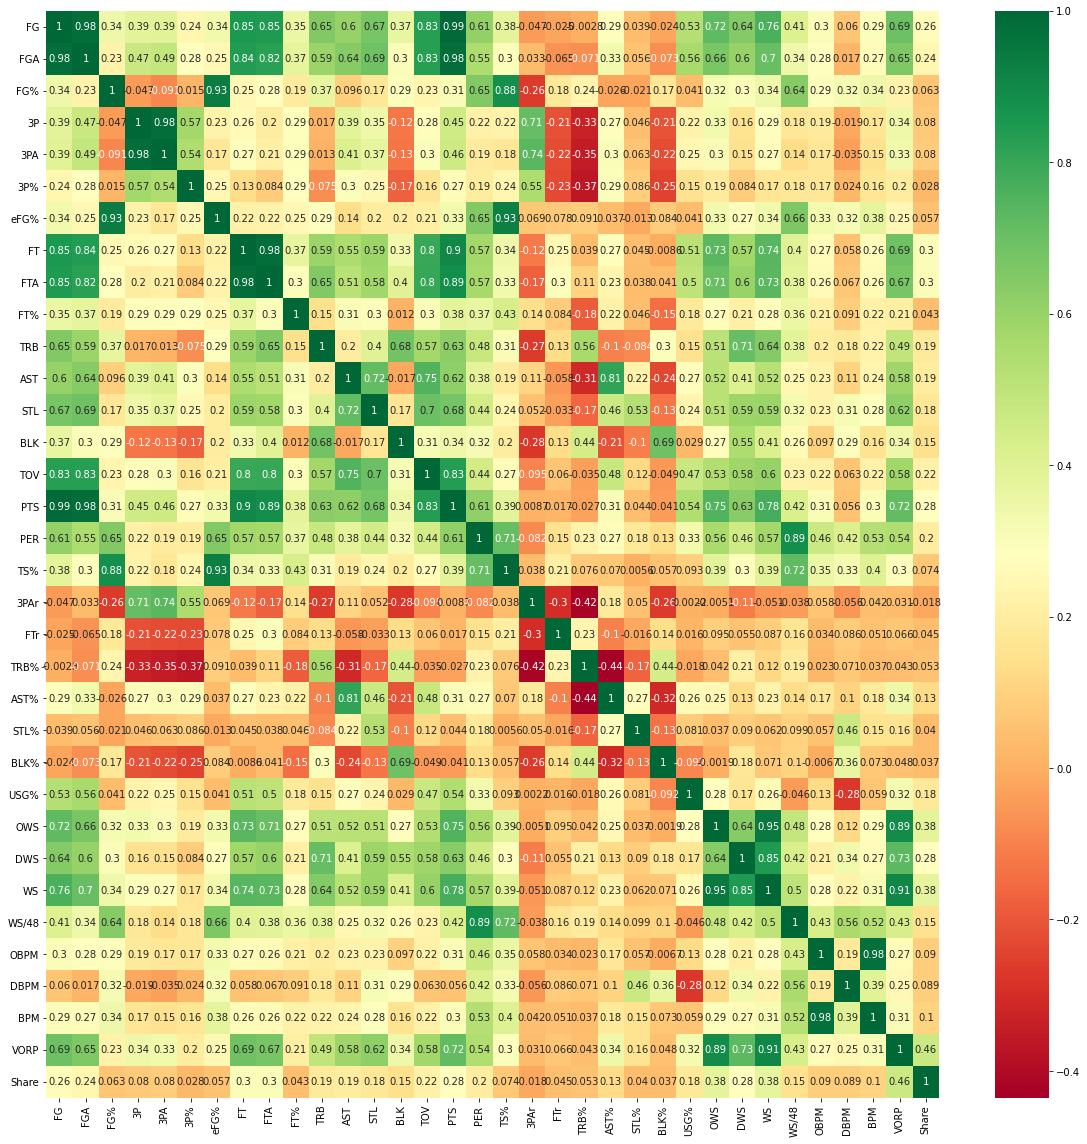

In [20]:
fig = plt.figure(figsize=(20, 20))

fig.set_facecolor('white')

sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')


In [21]:
features = ['VORP', 'WS', 'PER', 'USG%', 'PTS', 'AST', 'TRB', 'TOV', 'STL', 'BLK', 'eFG%', 'FTA']

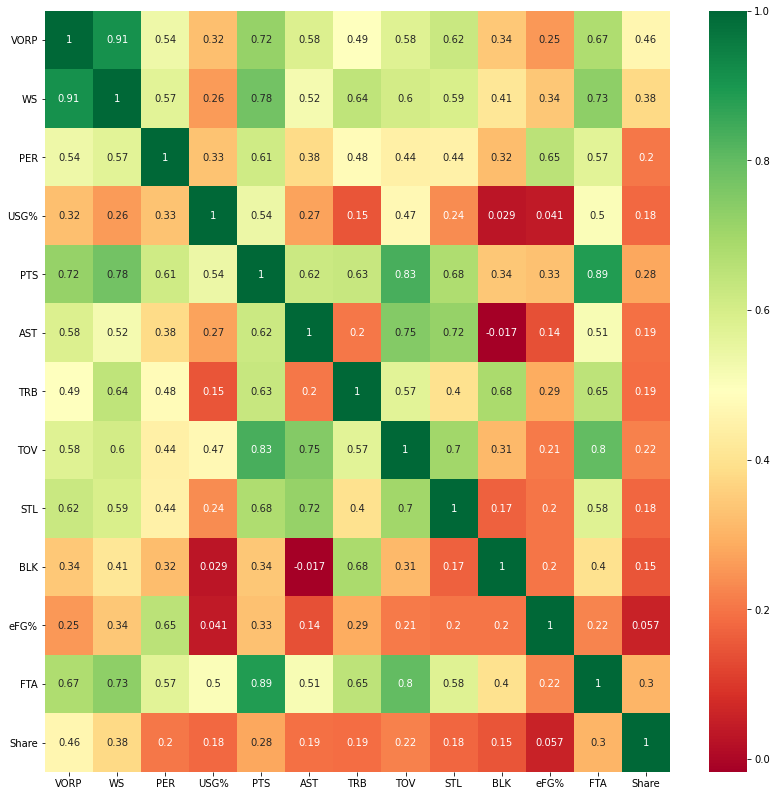

In [22]:
data = df[features + ['Share']]
fig = plt.figure(figsize = (14,14))

fig.set_facecolor('white')

sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')
_ = plt.yticks(rotation='horizontal')

In [23]:
data = df[orig_features]

In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

In [26]:
transformed = scaler.fit_transform(data)

In [27]:
pca = PCA(n_components=1)

In [28]:
decomposed = pca.fit_transform(transformed)

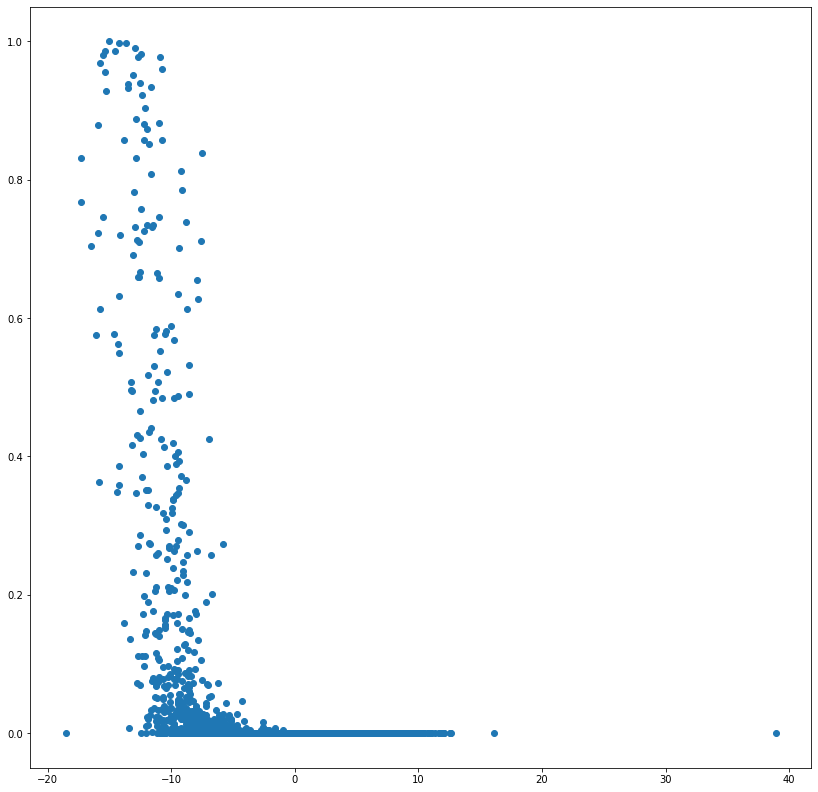

In [29]:
plt.figure(figsize=(14,14))

plt.scatter(decomposed, df.Share)

Text(0.5, 0, '% of Pts Won')

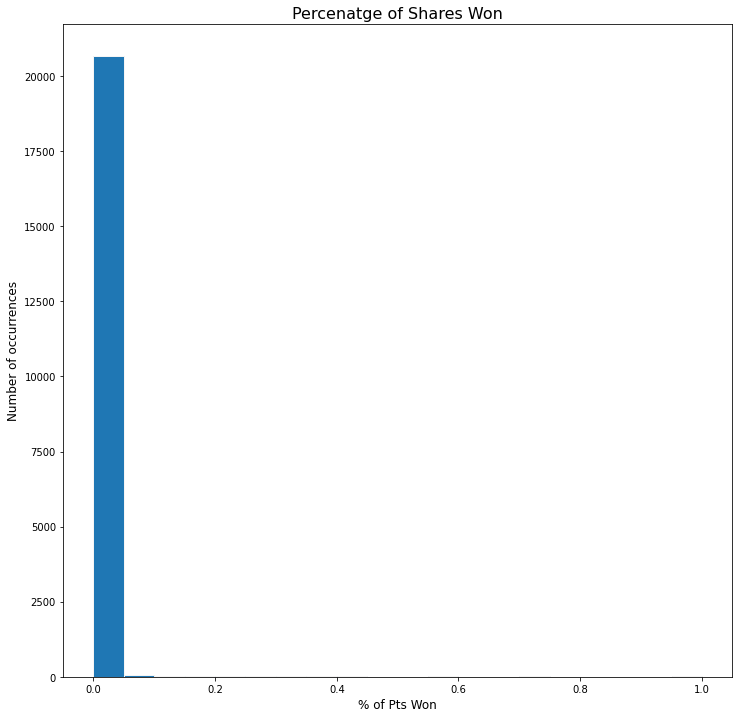

In [30]:
plt.figure(figsize=(12, 12))

plt.hist(df.Share, bins=20, edgecolor='#F5F5F5')
plt.title("Percenatge of Shares Won", size=16)
plt.ylabel("Number of occurrences", size=12)
plt.xlabel("% of Pts Won", size=12)

In [31]:
from sklearn.preprocessing import PolynomialFeatures, normalize, StandardScaler, MinMaxScaler
from sklearn.linear_model import SGDRegressor, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor

In [32]:

from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle

In [33]:
import logging

In [34]:
def pipeline(df, estimators, params, filename, poly_fit = None, scaler = None):
    
    unique_seasons = df.Season.unique()
    train_columns = ['VORP', 'WS', 'PER', 'USG%', 'PTS', 'AST', 'TRB', 'TOV', 'STL', 'BLK', 'eFG%', 'FTA']
    target_columns = ['Share']
    
    for handler in logging.root.handlers[:]:
        logging.root.removeHandler(handler)
    logging.basicConfig(filename=filename, filemode='w', level=logging.INFO)
    logger = logging.getLogger()
    
    minimal_error, best_estimator = None, None
    
    for estimator in estimators:
        
        try: 
            print(f"Starting with estimator: {estimator.__name__}")
            logging.info(f"Starting with estimator: {estimator.__name__}")

            for index, cur_params in enumerate(params[estimator.__name__]):

                regressor = estimator(**cur_params)

                # To collect MSE over each split
                errors = []

                # to collect accuracies
                accuracies = []
                top_1_accs = []
                
                for season in unique_seasons:
                    
                    train_data = df.loc[df.Season != season]
                    validation_data = df.loc[df.Season == season]
                    validation_data = validation_data.sort_values(by='Share', ascending=False)

                    # Get train data
                    train_x = train_data[train_columns].to_numpy()
                    train_y = train_data[target_columns].to_numpy()
                    train_y = train_y.reshape(train_y.shape[0], )

                    # Validate over one season only
                    val_x = validation_data[train_columns].to_numpy()
                    val_y = validation_data[target_columns].to_numpy()
                    val_y = val_y.reshape(val_y.shape[0], )

                    if poly_fit is not None:
                        # poly_fit = PolynomialFeatures(degree=2,interaction_only=False)
                        train_x = poly_fit.fit_transform(train_x)
                        val_x = poly_fit.fit_transform(val_x)
                    if scaler is not None:
                        train_x = scaler.fit_transform(train_x)
                        val_x = scaler.fit_transform(val_x)
                        
                    shuffle_x, shuffle_y = shuffle(train_x, train_y)

                    regressor.fit(shuffle_x, shuffle_y)
                    predicted_y = regressor.predict(val_x)

                    sorted_indices = np.argsort(predicted_y)[::-1]
                    correct_indices = np.arange(len(val_y))

                    accuracy = np.sum(sorted_indices[:5] == correct_indices[:5]) / len(correct_indices[:5])
                    accuracies.append(accuracy)
                    
                    top_1_accs.append(
                        np.sum(sorted_indices[:1] == correct_indices[:1]) / len(correct_indices[:1])
                    )
                    curr_error = mean_squared_error(val_y, predicted_y)
                    errors.append(curr_error)

                mean_error = np.average(errors)
                mean_accuracy = np.average(accuracies)
                mean_acc_at_1 = np.average(top_1_accs)
                logging.info(f"Params: {cur_params}, MSE over all splits is: {mean_error:.4f}, Mean acc at 5: {mean_accuracy:.4f}, Mean acc at 1: {mean_acc_at_1:.4f}")
                print(
                    f"Params: {cur_params}, MSE over all splits is: {mean_error:.4f}, Mean acc at 5: {mean_accuracy:.4f}, Mean acc at 1: {mean_acc_at_1:.4f}"
                    )
                if minimal_error is None or mean_error < minimal_error:
                    minimal_error = mean_error
                    best_estimator = estimator(*cur_params)
        except Exception:
            print(f"Exception: {estimator}")
            continue
            
    return best_estimator
                    

In [35]:
def define_rbf_svr():
    dicts = []
    for C in [0.1, 1, 10, 50, 100]:
        for gamma in [0.00001, 0.0001, 0.001, 0.01, 0.1]:
            dicts.append(
                {
                    'kernel': 'rbf',
                    'C': C,
                    'gamma': gamma
                }
            )
    return dicts

def define_poly_svr():
    dicts = []
    for C in [0.1, 1, 10, 100]:
        for gamma in [0.0001, 0.001, 0.01, 0.1]:
            for degree in [1, 2, 3]:
                dicts.append(
                    {
                        'kernel': 'poly',
                        'C': C,
                        'gamma': gamma,
                        'degree': degree
                    }
                )
    return dicts

def define_linear_svr():
    dicts = []
    for C in [0.1, 1, 10, 100]:
        dicts.append(
            {
                'kernel': 'linear',
                'C': C
            }
        )
    return dicts

In [36]:
def define_gradient_boosting_regressor():
    dicts = []
    for estimator in [10, 50, 100, 200]:
        for learning_rate in [0.1, 0.01, 0.001, 0.0001, 1]:
            for subsample in [0.5, 1.0]:
                dicts.append(
                    {
                        'n_estimators': estimator,
                        'learning_rate': learning_rate,
                        'subsample': subsample,
                    }
                )
    return dicts

def define_adaboost_regressor():
    dicts = []
    BaggingRegressor
    for n_estimators in [10, 50, 100, 200]:
        for learning_rate in [0.0001, 0.001, 0.01, 0.1, 1]:
            dicts.append(
                {
                    'base_estimator': Ridge(alpha=10.0),
                    'n_estimators': n_estimators,
                }
            )
    return dicts

In [37]:

def get_elastic_net_params():
    dicts = []
    for alpha in [0.2, 0.5, 1.0, 2.0, 5.0]:
        for ratio in [0.2, 0.4, 0.5, 0.6, 0.8]:
            dicts.append(
                {
                    'alpha': alpha,
                    'l1_ratio': ratio
                }
            )
    return dicts

In [38]:
estimators = [
    LinearRegression,
    Ridge,
    RandomForestRegressor,
    #ElasticNet,
    # AdaBoostRegressor,
    GradientBoostingRegressor,
    SVR,
    # MLPRegressor,
]
params = {
    LinearRegression.__name__: [
        {
            'n_jobs': -1,
        },
        {
            'n_jobs': -1,
            'normalize': True
        },
    ],
    Ridge.__name__: [
        {
            'alpha': 1.0
        },
        {
            'alpha': 10.0
        },
        {
            'alpha': 50.0
        },
        {
            'alpha': 100.0
        },
        {
            'alpha': 200.0
        },
        {
            'alpha': 500.0
        },
    ],
    ElasticNet.__name__: [
        *get_elastic_net_params()
    ],
    RandomForestRegressor.__name__: [
        {
            'n_estimators': 10,
            'n_jobs': -1
        },
        {
            'n_estimators': 100,
            'n_jobs': -1
        },
        {
            'n_estimators': 50,
            'n_jobs': -1
        },
        {
            'n_estimators': 50,
            'n_jobs': -1,
            'min_samples_split': 3
        },
        {
            'n_estimators': 100,
            'n_jobs': -1,
            'min_samples_split': 3
        },
        {
            'n_estimators': 200,
            'n_jobs': -1,
            'min_samples_split': 3
        },
        {
            'n_estimators': 200,
            'n_jobs': -1,
        },
    ],
    SVR.__name__: [
        # *define_poly_svr(),
        # *define_linear_svr(),
        *define_rbf_svr(),
    ],
    AdaBoostRegressor.__name__: [
        *define_adaboost_regressor()
    ],
    GradientBoostingRegressor.__name__: [
        *define_gradient_boosting_regressor()
    ],
}

In [ ]:
best_estimator = pipeline(
    df=df,
    estimators=estimators,
    params=params,
    filename="txts/temp.txt",
    # scaler=MinMaxScaler(),
    poly_fit=PolynomialFeatures(degree=2, interaction_only=False),
)

In [ ]:
best_estimator = pipeline(
    df=df,
    estimators=estimators,
    params=params,
    filename="txts/log_reg_poly_2.txt",
    # scaler=MinMaxScaler(),
    poly_fit=PolynomialFeatures(degree=2, interaction_only=True),
)

In [ ]:
best_estimator = pipeline(
    df=df,
    estimators=estimators,
    params=params,
    filename="txts/log_reg_poly_2_all.txt",
    # scaler=MinMaxScaler(),
    poly_fit=PolynomialFeatures(degree=2, interaction_only=False),
)

In [ ]:
best_estimator = pipeline(
    df=df,
    estimators=estimators,
    params=params,
    filename="txts/log_reg_poly_3.txt",
    # scaler=MinMaxScaler(),
    poly_fit=PolynomialFeatures(degree=3, interaction_only=True),
)



In [39]:
estimators = [
    LinearRegression,
    Ridge,
    Lasso,
    # RandomForestRegressor,
    GradientBoostingRegressor,
    #SVR,
    # MLPRegressor,
]
params = {
    LinearRegression.__name__: [
        {
            'n_jobs': -1,
        },
        {
            'n_jobs': -1,
            'normalize': True
        },
    ],
    Ridge.__name__: [
        {
            'alpha': 1.0
        },
        {
            'alpha': 10.0
        },
        {
            'alpha': 50.0
        },
        {
            'alpha': 100.0
        },
        {
            'alpha': 200.0
        },
        {
            'alpha': 500.0
        },
    ],
    Lasso.__name__: [
        {
            'alpha': 1.0,
        },
        {
            'alpha': 10.0
        },
        {
            'alpha': 100.0
        },
    ],
    RandomForestRegressor.__name__: [
        {
            'n_estimators': 10,
            'n_jobs': -1
        },
        {
            'n_estimators': 50,
            'n_jobs': -1
        },
        
    ],
    SVR.__name__: [
        *define_poly_svr(),
        *define_linear_svr(),
        #*define_rbf_svr(),
    ],
    GradientBoostingRegressor.__name__: [
        *define_gradient_boosting_regressor()
    ]
}

In [ ]:
best_estimator = pipeline(
    df=df,
    estimators=estimators,
    params=params,
    filename="log_reg_scaler.txt",
    scaler=MinMaxScaler(),
    # poly_fit=PolynomialFeatures(degree=3, interaction_only=True),
)

In [ ]:
best_estimator = pipeline(
    df=df,
    estimators=estimators,
    params=params,
    filename="log_reg_scaler_poly_2.txt",
    scaler=MinMaxScaler(),
    poly_fit=PolynomialFeatures(degree=2, interaction_only=True),
)

In [ ]:

best_estimator = pipeline(
    df=df,
    estimators=estimators,
    params=params,
    filename="log_reg_scaler_poly_2_all.txt",
    scaler=MinMaxScaler(),
    poly_fit=PolynomialFeatures(degree=2, interaction_only=False),
)

In [ ]:
best_estimator = pipeline(
    df=df,
    estimators=estimators,
    params=params,
    filename="log_reg_scaler_poly_3.txt",
    scaler=MinMaxScaler(),
    poly_fit=PolynomialFeatures(degree=3, interaction_only=True),
)

In [40]:
train_columns = ['VORP', 'WS', 'PER', 'USG%', 'PTS', 'AST', 'TRB', 'TOV', 'STL', 'BLK', 'eFG%', 'FTA']

target_columns = ['Share']

In [41]:

season = "2018-19"
#'n_estimators': 100, 'learning_rate': 0.001, 'subsample': 0.5}
# ''n_estimators': 100, 'learning_rate': 0.1, 'subsample': 0.5, 'loss': 'huber'
model = GradientBoostingRegressor(n_estimators=50, learning_rate= 0.1, subsample=1.0)
model = RandomForestRegressor(n_estimators=50, n_jobs=-1)
# model = Ridge(alpha=0.1)
poly_fit = PolynomialFeatures(degree=3, interaction_only=True)

In [42]:

train_data = df.loc[df.Season != season]
validation_data = df.loc[df.Season == season]
#validation_data = validation_data.sort_values(by='award_share')

# Get train data
train_x = train_data[train_columns].to_numpy()
#train_x = poly_fit.fit_transform(train_x)
train_y = train_data[target_columns].to_numpy()
train_y = train_y.reshape(train_y.shape[0], )

# Validate over one season only
val_x = validation_data[train_columns].to_numpy()
#val_x = poly_fit.fit_transform(val_x)
val_y = validation_data[target_columns].to_numpy()
val_y = val_y.reshape(val_y.shape[0], )

In [43]:
model.fit(train_x, train_y)
predict_y = model.predict(val_x)
predict_y

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e-05, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 2.9600e-03, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 5.8122e-01,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 2.0000e-05, 6.0000e-05, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.4800e-03, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 8.0000e-05, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 2.0000e-05, 0.0000e+00, 0.0000e+00, 1.0000e-04,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 3.5000e-03, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e

In [44]:
val_y

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.932, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   ,

In [45]:
import os

In [46]:
results = os.listdir('logs/')
result_list = []
for name in results:
    if 'log_final_features' in name:
        added_name = name.split(".txt")[0].split("log_final_features_")[1]
        estimator = None
        with open("logs/" + name) as f:
            lines = f.readlines()
        for line in lines:
            if "{" not in line:
                estimator = line.split(" ")[-1].strip()
                continue
            params = line.split("{")[1].split("}")[0].strip().replace("'", "")
            mse = float(line.split("MSE over all splits is: ")[1].split(",")[0].strip())
            acc_top_1 = float(line.split("Mean acc at 1: ")[1].strip())
            acc_top_5 = float(line.split("Mean acc at 5: ")[1].split(",")[0].strip())
            result_list.append((added_name,estimator, params, acc_top_5, acc_top_1, mse))

In [47]:
sorted_results = sorted(result_list, key=lambda item: item[-1])

In [48]:
with open('reg_results_mse_sorted.txt', 'w') as f:
    for line in sorted_results:
        string = ""
        for item in line:
            string = string + str(item) + "|"
        string += "\n"
        f.write(string)

In [49]:
cls_data_frame = None
ranks = []
minimum = None
for season in df.Season.unique():
    season_data = df.loc[df.Season == season]
    num_pos = len(season_data)
    ranks = list(range(1, num_pos+1))
    season_data = season_data.sort_values(by='Share', ascending=False)
    is_mvp = [1 if rank == 1 else 0 for rank in ranks]
    season_data['rank'] = ranks
    season_data['is_mvp'] = is_mvp
    season_data = season_data[:10]
    if cls_data_frame is None:
        cls_data_frame = season_data
    else:
        cls_data_frame = cls_data_frame.append(season_data)

In [50]:
cls_data_frame.to_csv('cls_data_frame.csv')

In [51]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

In [52]:
features = ['VORP', 'WS', 'PER', 'USG%', 'PTS', 'AST', 'TRB', 'TOV', 'STL', 'BLK', 'eFG%', 'FTA']
x_data = cls_data_frame[features].to_numpy()
y_data = cls_data_frame[['rank']].to_numpy()
scaler = MinMaxScaler()
x_data = scaler.fit_transform(x_data)
y_data = y_data.reshape(y_data.shape[0], )

In [53]:
selector = SelectKBest(mutual_info_classif, k=5)

In [54]:
best_feat = selector.fit_transform(x_data, y_data)

In [55]:

sorted_indices = np.argsort(selector.scores_)[::-1]

In [56]:

for index in sorted_indices:
    print(f"{features[index]}: {selector.scores_[index]:.4f}")

VORP: 0.2173
PER: 0.2053
WS: 0.1670
eFG%: 0.0828
PTS: 0.0757
FTA: 0.0706
TRB: 0.0563
STL: 0.0534
AST: 0.0433
BLK: 0.0269
TOV: 0.0175
USG%: 0.0147


In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
clf = RandomForestClassifier(n_estimators=100)

In [59]:

clf.fit(x_data, y_data)

RandomForestClassifier()

In [60]:
sorted_indices = np.argsort(clf.feature_importances_)[::-1]
for index in sorted_indices:
    print(f"{features[index]}: {clf.feature_importances_[index]}")

WS: 0.10597371548153825
PER: 0.095050583808484
VORP: 0.09475594221228373
PTS: 0.08901029444684092
eFG%: 0.08372519773822275
TRB: 0.08302154159198141
FTA: 0.08222302846620626
USG%: 0.08215114294579577
AST: 0.07938137276908215
TOV: 0.07062764106804664
BLK: 0.06780367651920788
STL: 0.06627586295231024


In [61]:
def get_max_prob_for_rank(predictions):
    indices = []
    visited = []
    # return np.argsort(predictions[:, 0])[::-1]
    return np.argsort(predictions[:, 0])[::-1] + 1
    for i in range(len(predictions)):
        rank_i_values = predictions[:,i]
        for top_rank in np.argsort(predictions[:,i])[::-1]:
            if top_rank in visited:
                continue
            indices.append(top_rank+1)
            visited.append(top_rank)
            break
    return indices

In [62]:
def mean_reciprocal_rank(preds, ground_truths):
    total_sum = 0.0
    for i in range(len(ground_truths)):
        index = np.where(preds == ground_truths)[0]
        if len(index) == 0:
            total_sum += 0.0
            continue
        total_sum += 1. / (index[0]+1)
    return total_sum / len(ground_truths)

In [63]:
from sklearn.preprocessing import PolynomialFeatures, normalize, StandardScaler, MinMaxScaler
from sklearn.utils import shuffle
import logging

In [64]:
def cls_pipeline(df, estimators, params, filename, poly_fit = None, scaler = None):
    
    unique_seasons = df.Season.unique()
    """
    train_columns = [
        'fga', 'fg3a', 'fta', 'fg_pct', 'fg3_pct', 'ft_pct', 'per', 'ts_pct', 'usg_pct', 'bpm',
        'mp_per_g', 'pts_per_g', 'trb_per_g', 'ast_per_g', 'stl_per_g', 'blk_per_g', 'ws_per_48'            
    ]
    
    train_columns = [
        'fga', 'fta', 'per', 'ts_pct', 'usg_pct', 'bpm', 'pts_per_g','ws_per_48'            
    ]
    """
    features = ['VORP', 'WS', 'PER', 'USG%', 'PTS', 'AST', 'TRB', 'TOV', 'STL', 'BLK', 'eFG%', 'FTA']
    target_columns = ['rank']
    
    for handler in logging.root.handlers[:]:
        logging.root.removeHandler(handler)
    logging.basicConfig(filename=filename, filemode='w', level=logging.INFO)
    logger = logging.getLogger()
    
    maximal_acc, best_estimator = None, None
    
    for estimator in estimators:
        
        
            print(f"Starting with estimator: {estimator.__name__}")
            logging.info(f"Starting with estimator: {estimator.__name__}")

            for index, cur_params in enumerate(params[estimator.__name__]):

                classifier = estimator(**cur_params)

                # To collect MSE over each split
                total_accuracies = []

                # to collect accuracies
                accuracies = []
                top_1_accs = []

                for season in unique_seasons:

                    train_data = df.loc[df.Season != season]
                    validation_data = df.loc[df.Season == season]
                    validation_data = validation_data.sort_values(by='Share', ascending=False)

                    # Get train data
                    train_x = train_data[train_columns].to_numpy()
                    train_y = train_data[target_columns].to_numpy()
                    train_y = train_y.reshape(train_y.shape[0], )

                    # Validate over one season only
                    val_x = validation_data[train_columns].to_numpy()
                    val_y = validation_data[target_columns].to_numpy()
                    val_y = val_y.reshape(val_y.shape[0], )

                    if poly_fit is not None:
                        # poly_fit = PolynomialFeatures(degree=2,interaction_only=False)
                        train_x = poly_fit.fit_transform(train_x)
                        val_x = poly_fit.fit_transform(val_x)

                    if scaler is not None:
                        train_x = scaler.fit_transform(train_x)
                        val_x = scaler.fit_transform(val_x)

                    shuffle_x, shuffle_y = shuffle(train_x, train_y)

                    classifier.fit(shuffle_x, shuffle_y)
                    predicted_y = classifier.predict_proba(val_x)

                    # sorted_indices = np.argsort(predicted_y)[::-1]
                    # correct_indices = np.arange(len(val_y))
                    # print(predict_y)
                    indices = get_max_prob_for_rank(predicted_y)
                    
                    accuracy = np.sum(indices[:5] == val_y[:5]) / len(val_y[:5])
                    accuracies.append(accuracy)
                    
                    top_1_accs.append(
                        np.sum(indices[:1] == val_y[:1]) / len(val_y[:1])
                    )
                    #curr_error = mean_squared_error(y_true=list(val_y[:5]) + list(val_y[-3:]),
                    #                                y_pred=list(predicted_y[:5]) + list(predicted_y[-3:])
                    total_accuracies.append(mean_reciprocal_rank(preds=indices[:5], ground_truths=val_y[:5]))

                mean_total_acc = np.average(total_accuracies)
                mean_accuracy = np.average(accuracies)
                mean_acc_at_1 = np.average(top_1_accs)
                logging.info(f"Params: {cur_params}, MRR top 5 is: {mean_total_acc:.4f}, Mean acc at 5: {mean_accuracy:.4f}, Mean acc at 1: {mean_acc_at_1:.4f}")
                print(
                    f"Params: {cur_params}, MRR top 5 is: {mean_total_acc:.4f}, Mean acc at 5: {mean_accuracy:.4f}, Mean acc at 1: {mean_acc_at_1:.4f}"
                )


                if maximal_acc is None or mean_total_acc > maximal_acc:
                    maximal_acc = mean_total_acc
                    best_estimator = estimator(*cur_params)

            
    return best_estimator

In [65]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [66]:
def get_log_reg():
    dicts = []
    for C in [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]:
        for solver in ['newton-cg', 'lbfgs']:
            dicts.append(
                {
                    'multi_class': 'multinomial',
                    'solver': solver,
                    'C': C,
                    'n_jobs': -1,
                    'max_iter': 2000
                }
            )
    return dicts
            
def get_svc():
    dicts = []
    for C in [0.001, 0.01, 0.1, 1.0, 10, 100]:
        for gamma in [0.0001, 0.001, 0.01, 0.1, 1.0]:
            dicts.append(
                {
                    'C': C,
                    'gamma': gamma,
                    'probability': True
                }
            )
    return dicts

def get_rf_cls():
    dicts = []
    for n_estimators in [10, 100, 200]:
        for min_samples_split in [2, 3]:
            dicts.append(
                {
                    'n_estimators': n_estimators,
                    'min_samples_split': min_samples_split,
                    'n_jobs': -1
                }
            )
    return dicts

def define_gradient_boosting_cls():
    dicts = []
    for estimator in [10, 50, 100]:
        for learning_rate in [0.1, 0.01, 0.001, 0.0001]:
            for subsample in [0.5, 1.0]:
                dicts.append(
                    {
                        'n_estimators': estimator,
                        'learning_rate': learning_rate,
                        'subsample': subsample,
                    }
                )
    return dicts

In [67]:
estimators = [
    LogisticRegression,
    RandomForestClassifier,
    GradientBoostingClassifier,
    SVC,
]
params = {
    LogisticRegression.__name__: [
        *get_log_reg()
    ],
    GradientBoostingClassifier.__name__: [
        *define_gradient_boosting_cls()
    ],
    SVC.__name__: [
        *get_svc()
    ],
    RandomForestClassifier.__name__ : [
        *get_rf_cls()
    ]

}

In [ ]:
best_estimator = cls_pipeline(
    df=cls_data_frame,
    estimators=estimators,
    params=params,
    filename="log_cls_mrr.txt",
    scaler=MinMaxScaler(),
    # poly_fit=PolynomialFeatures(degree=4, interaction_only=True),
)

In [ ]:
best_estimator = cls_pipeline(
    df=cls_data_frame,
    estimators=estimators,
    params=params,
    filename="log_cls_poly_2.txt",
    scaler=MinMaxScaler(),
    poly_fit=PolynomialFeatures(degree=2, interaction_only=True),
)

In [ ]:

best_estimator = cls_pipeline(
    df=cls_data_frame,
    estimators=estimators,
    params=params,
    filename="log_cls_poly_2_all.txt",
    # scaler=MinMaxScaler(),
    poly_fit=PolynomialFeatures(degree=2, interaction_only=False),
)

In [ ]:
best_estimator = cls_pipeline(
    df=cls_data_frame,
    estimators=estimators,
    params=params,
    filename="log_cls_poly_3.txt",
    # scaler=MinMaxScaler(),
    poly_fit=PolynomialFeatures(degree=3, interaction_only=True),
)

In [ ]:
best_estimator = cls_pipeline(
    df=cls_data_frame,
    estimators=estimators,
    params=params,
    filename="log_cls_poly_3_all.txt",
    # scaler=MinMaxScaler(),
    poly_fit=PolynomialFeatures(degree=3, interaction_only=False),
)

In [68]:
results = os.listdir('.')
result_list = []
for name in results:
    if 'log_cls' in name:
        added_name = name.split(".txt")[0].split("log_cls")[1]
        estimator = None
        with open(name) as f:
            lines = f.readlines()
        for line in lines:
            if "{" not in line:
                estimator = line.split(" ")[-1].strip()
                continue
            params = line.split("{")[1].split("}")[0].strip().replace("'", "")
            #mse = float(line.split("MSE over all splits is: ")[1].split(",")[0].strip())
            acc_top_1 = float(line.split("Mean acc at 1: ")[1].strip())
            acc_top_5 = float(line.split("Mean acc at 5: ")[1].split(",")[0].strip())
            result_list.append((added_name,estimator, params, acc_top_5, acc_top_1))

In [69]:
sorted_results = sorted(result_list, key=lambda item: -item[-1])

In [70]:

for item in sorted_results:
    print(item)

('_mrr', 'GradientBoostingClassifier', 'n_estimators: 50, learning_rate: 0.001, subsample: 0.5', 0.2878, 0.5854)
('_mrr', 'SVC', 'C: 100, gamma: 0.1, probability: True', 0.3073, 0.5854)
('_mrr', 'GradientBoostingClassifier', 'n_estimators: 50, learning_rate: 0.0001, subsample: 0.5', 0.2829, 0.561)
('_mrr', 'SVC', 'C: 10, gamma: 0.1, probability: True', 0.2878, 0.561)
('_poly_2', 'LogisticRegression', 'multi_class: multinomial, solver: newton-cg, C: 0.001, n_jobs: -1, max_iter: 2000', 0.3024, 0.561)
('_poly_2', 'LogisticRegression', 'multi_class: multinomial, solver: lbfgs, C: 0.001, n_jobs: -1, max_iter: 2000', 0.3024, 0.561)
('_poly_2', 'LogisticRegression', 'multi_class: multinomial, solver: newton-cg, C: 0.01, n_jobs: -1, max_iter: 2000', 0.2976, 0.561)
('_poly_2', 'LogisticRegression', 'multi_class: multinomial, solver: lbfgs, C: 0.01, n_jobs: -1, max_iter: 2000', 0.2976, 0.561)
('_poly_2', 'LogisticRegression', 'multi_class: multinomial, solver: newton-cg, C: 0.1, n_jobs: -1, max_

In [71]:
season = '2016-17'

In [72]:
train_columns = ['VORP', 'WS', 'PER', 'USG%', 'PTS', 'AST', 'TRB', 'TOV', 'STL', 'BLK', 'eFG%', 'FTA']

target_columns = ['Share']

In [73]:
train_data = cls_data_frame.loc[df.Season != season]
validation_data = cls_data_frame.loc[df.Season == season]
#validation_data = validation_data.sort_values(by='award_share', ascending=False)

# Get train data
train_x = train_data[train_columns].to_numpy()
train_y = train_data[target_columns].to_numpy()
train_y = train_y.reshape(train_y.shape[0], )

# Validate over one season only
val_x = validation_data[train_columns].to_numpy()
val_y = validation_data[target_columns].to_numpy()
val_y = val_y.reshape(val_y.shape[0], )

In [101]:
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(train_y)

In [107]:

print(utils.multiclass.type_of_target(train_y))

continuous


In [109]:
# 'multi_class': 'multinomial', 'solver': 'lbfgs', 'C': 100.0, 'n_jobs': -1, 'max_iter': 2000
model = LogisticRegression(multi_class='multinomial', solver='newton-cg', C=1.0, max_iter=2000, n_jobs=-1)
#model = SVC(probability=True, C=10, gamma=0.001)
#model = RandomForestClassifier(n_estimators=100, min_samples_split=3)

In [105]:
train_y

array([0.665, 0.143, 0.086, 0.068, 0.009, 0.009, 0.009, 0.007, 0.005,
       0.   , 0.658, 0.613, 0.414, 0.261, 0.12 , 0.106, 0.077, 0.072,
       0.046, 0.028, 0.735, 0.588, 0.294, 0.19 , 0.167, 0.159, 0.146,
       0.097, 0.048, 0.045, 0.96 , 0.485, 0.406, 0.301, 0.149, 0.056,
       0.053, 0.044, 0.04 , 0.02 , 0.858, 0.491, 0.401, 0.201, 0.151,
       0.129, 0.116, 0.092, 0.05 , 0.046, 0.978, 0.338, 0.279, 0.264,
       0.177, 0.172, 0.09 , 0.083, 0.081, 0.033, 0.981, 0.522, 0.263,
       0.247, 0.173, 0.171, 0.072, 0.071, 0.036, 0.027, 0.94 , 0.576,
       0.347, 0.326, 0.164, 0.145, 0.036, 0.022, 0.014, 0.012, 0.831,
       0.659, 0.635, 0.136, 0.108, 0.069, 0.05 , 0.045, 0.033, 0.019,
       0.782, 0.704, 0.426, 0.235, 0.211, 0.111, 0.033, 0.026, 0.024,
       0.021, 0.691, 0.667, 0.613, 0.233, 0.176, 0.111, 0.07 , 0.013,
       0.01 , 0.005, 0.928, 0.518, 0.496, 0.231, 0.148, 0.078, 0.033,
       0.03 , 0.026, 0.026, 0.938, 0.584, 0.351, 0.273, 0.104, 0.084,
       0.069, 0.067,

In [110]:
model.fit(train_x, encoded)

LogisticRegression(max_iter=2000, multi_class='multinomial', n_jobs=-1,
                   solver='newton-cg')

In [111]:
model.predict_proba(val_x)

array([[4.02036379e-18, 3.01541863e-10, 4.97359114e-10, ...,
        4.07661532e-06, 3.80783557e-06, 6.78891485e-06],
       [9.40774845e-14, 1.45591062e-06, 3.88469322e-07, ...,
        8.57542059e-06, 8.53950935e-05, 5.84985249e-05],
       [9.00532366e-08, 3.28322663e-03, 4.32523695e-03, ...,
        1.25851284e-04, 4.17416350e-05, 3.87355756e-03],
       ...,
       [8.35551595e-07, 5.36012230e-03, 9.39579604e-04, ...,
        7.62096179e-09, 3.16070350e-10, 3.91877707e-06],
       [6.32161103e-09, 8.40583775e-04, 8.42795096e-04, ...,
        1.00194172e-04, 4.46445842e-05, 1.07339892e-05],
       [2.08386620e-07, 2.98156991e-03, 4.03359192e-03, ...,
        1.46855803e-04, 2.47517822e-04, 5.75720837e-04]])

In [112]:

preds = model.predict_proba(val_x)
visited = []
for i in range(len(preds)):
    rank_i_values = preds[:,i]
    for top_rank in np.argsort(preds[:,i])[::-1]:
        if top_rank in visited:
            continue
        print(f"{i+1}. is index: {top_rank+1}")
        visited.append(top_rank)
        break

1. is index: 8
2. is index: 7
3. is index: 3
4. is index: 6
5. is index: 10
6. is index: 4
7. is index: 9
8. is index: 5
9. is index: 1
10. is index: 2


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20950 entries, 0 to 21785
Data columns (total 44 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Season    20950 non-null  object 
 1   Player    20950 non-null  object 
 2   Pos       20950 non-null  object 
 3   Age       20950 non-null  int64  
 4   Tm        20950 non-null  object 
 5   G         20950 non-null  int64  
 6   MP        20950 non-null  float64
 7   FG        20950 non-null  float64
 8   FGA       20950 non-null  float64
 9   FG%       20950 non-null  float64
 10  3P        20950 non-null  float64
 11  3PA       20950 non-null  float64
 12  3P%       20950 non-null  float64
 13  eFG%      20950 non-null  float64
 14  FT        20950 non-null  float64
 15  FTA       20950 non-null  float64
 16  FT%       20950 non-null  float64
 17  TRB       20950 non-null  float64
 18  AST       20950 non-null  float64
 19  STL       20950 non-null  float64
 20  BLK       20950 non-null  fl

In [114]:
train_columns = ['VORP', 'WS', 'PER', 'USG%', 'PTS', 'AST', 'TRB', 'TOV', 'STL', 'BLK', 'eFG%', 'FTA']
train_regression_columns = ['VORP', 'WS', 'PER', 'USG%', 'PTS', 'AST', 'TRB', 'TOV', 'STL', 'BLK', 'eFG%', 'FTA']
train_cls_columns = ['VORP', 'WS', 'PER', 'USG%', 'PTS', 'AST', 'TRB', 'TOV', 'STL', 'BLK', 'eFG%', 'FTA']


target_reg_columns = ['Share']
target_cls_columns = ['Share']

In [115]:
test_reg_columns = [
    'TS%', 'BPM', 'MP', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'WS', 'eFG%',
]
test_cls_columns = [
        'TS%', 'BPM','PER', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'WS', 'PER', 'USG%',
]

In [121]:

merged = pd.read_csv('NBA_final_stats/2021_complete_stats.csv')

In [127]:
sorted_merged = merged.sort_values(by='VORP', ascending=False)

In [128]:
top_players = sorted_merged[:40]

In [129]:
'''base_url = 'https://www.basketball-reference.com/players'
win_percentages = []
for i in range(len(top_players)):
    player_id = top_players.iloc[i].PlayerId[1:]
    full_url = f'{base_url}/{player_id[0]}/{player_id}.html'
    response = requests.get(full_url)
    soup = BeautifulSoup(response.text)
    time.sleep(0.5)
    string = f"Player: {player_id} "
    for p in soup.findAll('p'):
        if "Team" in p.text:
            full_url = 'https://www.basketball-reference.com' + str(p.find('a')['href'])
            soup = BeautifulSoup(requests.get(full_url).text)
            time.sleep(0.5)
            for item in soup.findAll("p"):
                if "Record" in item.text:
                    record = re.findall("\d+\-\d+", item.text)[0]
                    splitted = record.split("-")
                    win_pct = float(splitted[0]) / (float(splitted[1]) + float(splitted[0]))
                    win_percentages.append(win_pct)
                    string += "found"
                    break
            break
    print(f"{string}")'''

'base_url = \'https://www.basketball-reference.com/players\'\nwin_percentages = []\nfor i in range(len(top_players)):\n    player_id = top_players.iloc[i].PlayerId[1:]\n    full_url = f\'{base_url}/{player_id[0]}/{player_id}.html\'\n    response = requests.get(full_url)\n    soup = BeautifulSoup(response.text)\n    time.sleep(0.5)\n    string = f"Player: {player_id} "\n    for p in soup.findAll(\'p\'):\n        if "Team" in p.text:\n            full_url = \'https://www.basketball-reference.com\' + str(p.find(\'a\')[\'href\'])\n            soup = BeautifulSoup(requests.get(full_url).text)\n            time.sleep(0.5)\n            for item in soup.findAll("p"):\n                if "Record" in item.text:\n                    record = re.findall("\\d+\\-\\d+", item.text)[0]\n                    splitted = record.split("-")\n                    win_pct = float(splitted[0]) / (float(splitted[1]) + float(splitted[0]))\n                    win_percentages.append(win_pct)\n                    s

In [184]:
data_frame = pd.read_csv('mvp_voting.csv')

In [185]:
cls_data_frame = pd.read_csv('cls_data_frame.csv')

In [186]:
test_data = pd.read_csv('NBA_final_stats/2021_complete_stats.csv')

In [196]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1381 entries, 0 to 1380
Data columns (total 54 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1381 non-null   int64  
 1   yr          1381 non-null   object 
 2   Player      705 non-null    object 
 3   Pos         705 non-null    object 
 4   Age         705 non-null    float64
 5   Tm          705 non-null    object 
 6   G           705 non-null    float64
 7   GS          705 non-null    float64
 8   MP          705 non-null    float64
 9   FG          705 non-null    float64
 10  FGA         705 non-null    float64
 11  FG%         703 non-null    float64
 12  3P          705 non-null    float64
 13  3PA         705 non-null    float64
 14  3P%         670 non-null    float64
 15  2P          705 non-null    float64
 16  2PA         705 non-null    float64
 17  2P%         699 non-null    float64
 18  eFG%        703 non-null    float64
 19  FT          705 non-null   

In [203]:
test_data = test_data[
    [ 'FGA', '3PA', 'FTA', 'PER', 'TS%', 'USG%', 'BPM',
       'Player', 'VORP', 'G', 'MP', 'PTS', 'TRB',
       'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%',
       'WS', 'WS/48']]

In [218]:
train_columns = ['VORP', 'WS', 'PER', 'USG%', 'PTS', 'AST', 'TRB', 'TOV', 'STL', 'BLK', 'WS/48', 'FTA']
train_regression_columns = ['VORP', 'WS', 'PER', 'USG%', 'PTS', 'AST', 'TRB', 'FG%', 'STL', 'BLK', 'WS/48', 'MP']
train_cls_columns = ['VORP', 'WS', 'PER', 'USG%', 'PTS', 'AST', 'TRB', 'TOV', 'STL', 'BLK', 'WS/48', 'FTA']


target_reg_columns = ['Share']
target_cls_columns = ['Share']

In [219]:
test_reg_columns = ['VORP', 'WS', 'PER', 'USG%', 'PTS', 'AST', 'TRB', 'FG%', 'STL', 'BLK', 'WS/48', 'MP']
test_cls_columns = [
        'TS%', 'BPM','PER', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'WS', 'PER', 'USG%',
]

In [220]:

from sklearn.preprocessing import PolynomialFeatures, normalize, StandardScaler, MinMaxScaler
from sklearn.linear_model import SGDRegressor, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.utils import shuffle

In [221]:
def get_predictions_for_regression_model(model, poly_fit, train_data, test_data, scaler=None, should_print=True):
    train_x = train_data[train_regression_columns].to_numpy()
    train_y = train_data[target_reg_columns].to_numpy()

    train_x, train_y = shuffle(train_x, train_y)
    train_y = train_y.reshape(train_y.shape[0], )
    
    test_x = test_data[test_reg_columns].to_numpy()
    test_x = np.nan_to_num(test_x)
    
    if poly_fit is not None:
        train_x = poly_fit.fit_transform(train_x)
        test_x = poly_fit.fit_transform(test_x)
    
    if scaler is not None:
        train_x = scaler.fit_transform(train_x)
        test_x = scaler.fit_transform(test_x)
    
    model.fit(train_x, train_y)
    predict_y = model.predict(test_x)
    sorted_indices = np.argsort(predict_y)[::-1]
    predictions = predict_y[sorted_indices]
    
    formatted_preds = []
    if should_print:
        print(f"Predictions:")
    for i in range(10):
        if predictions[i] < 0:
            break
        if should_print:
            print(f"{i+1}. {test_data.iloc[sorted_indices[i]].Player}: {predictions[i]}")
        formatted_preds.append((test_data.iloc[sorted_indices[i]].Player, predictions[i]))
    return formatted_preds

In [222]:
get_predictions_for_regression_model(
    model = GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, subsample=1.0),
    poly_fit = PolynomialFeatures(degree=2, interaction_only=False),
    train_data=data_frame,
    test_data=test_data
)

Predictions:
1. Nikola Jokić: 0.7674032566819813
2. Giannis Antetokounmpo: 0.25825125992727516
3. James Harden: 0.21005949122129228
4. James Harden: 0.20645188335594677
5. Norvel Pelle: 0.19304134226442876
6. Udonis Haslem: 0.17075563909737546
7. Joel Embiid: 0.16213894133137075
8. Anžejs Pasečņiks: 0.1553449469243184
9. Stephen Curry: 0.14854743011439617
10. Luka Dončić: 0.1392957839660586


[('Nikola Jokić', 0.7674032566819813),
 ('Giannis Antetokounmpo', 0.25825125992727516),
 ('James Harden', 0.21005949122129228),
 ('James Harden', 0.20645188335594677),
 ('Norvel Pelle', 0.19304134226442876),
 ('Udonis Haslem', 0.17075563909737546),
 ('Joel Embiid', 0.16213894133137075),
 ('Anžejs Pasečņiks', 0.1553449469243184),
 ('Stephen Curry', 0.14854743011439617),
 ('Luka Dončić', 0.1392957839660586)]

In [223]:
get_predictions_for_regression_model(
    model = GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, subsample=1.0),
    poly_fit = PolynomialFeatures(degree=2, interaction_only=True),
    train_data=data_frame,
    test_data=test_data
)

Predictions:
1. Nikola Jokić: 0.7767592504591503
2. Giannis Antetokounmpo: 0.25825125992727516
3. Udonis Haslem: 0.2198209597776849
4. Norvel Pelle: 0.217950016247432
5. James Harden: 0.21005949122129222
6. James Harden: 0.20645188335594672
7. Joel Embiid: 0.15069268661393542
8. Luka Dončić: 0.1392957839660586
9. Stephen Curry: 0.13666209091525197
10. LeBron James: 0.09809200730578477


[('Nikola Jokić', 0.7767592504591503),
 ('Giannis Antetokounmpo', 0.25825125992727516),
 ('Udonis Haslem', 0.2198209597776849),
 ('Norvel Pelle', 0.217950016247432),
 ('James Harden', 0.21005949122129222),
 ('James Harden', 0.20645188335594672),
 ('Joel Embiid', 0.15069268661393542),
 ('Luka Dončić', 0.1392957839660586),
 ('Stephen Curry', 0.13666209091525197),
 ('LeBron James', 0.09809200730578477)]

In [138]:
train_x

array([[ 7.3  , 14.8  , 25.3  , ...,  3.4  ,  0.604,  5.8  ],
       [ 6.8  , 12.5  , 25.4  , ...,  1.8  ,  0.52 ,  6.8  ],
       [ 4.4  , 10.6  , 24.   , ...,  1.   ,  0.536,  7.6  ],
       ...,
       [ 5.9  , 11.6  , 26.9  , ...,  0.3  ,  0.563,  7.8  ],
       [ 5.5  ,  9.8  , 24.9  , ...,  0.6  ,  0.565,  4.1  ],
       [ 2.   ,  5.4  , 17.9  , ...,  0.9  ,  0.512,  5.1  ]])

In [140]:
train_y

array([0.665, 0.143, 0.086, 0.068, 0.009, 0.009, 0.009, 0.007, 0.005,
       0.   , 0.658, 0.613, 0.414, 0.261, 0.12 , 0.106, 0.077, 0.072,
       0.046, 0.028, 0.735, 0.588, 0.294, 0.19 , 0.167, 0.159, 0.146,
       0.097, 0.048, 0.045, 0.96 , 0.485, 0.406, 0.301, 0.149, 0.056,
       0.053, 0.044, 0.04 , 0.02 , 0.858, 0.491, 0.401, 0.201, 0.151,
       0.129, 0.116, 0.092, 0.05 , 0.046, 0.978, 0.338, 0.279, 0.264,
       0.177, 0.172, 0.09 , 0.083, 0.081, 0.033, 0.981, 0.522, 0.263,
       0.247, 0.173, 0.171, 0.072, 0.071, 0.036, 0.027, 0.94 , 0.576,
       0.347, 0.326, 0.164, 0.145, 0.036, 0.022, 0.014, 0.012, 0.831,
       0.659, 0.635, 0.136, 0.108, 0.069, 0.05 , 0.045, 0.033, 0.019,
       0.782, 0.704, 0.426, 0.235, 0.211, 0.111, 0.033, 0.026, 0.024,
       0.021, 0.691, 0.667, 0.613, 0.233, 0.176, 0.111, 0.07 , 0.013,
       0.01 , 0.005, 0.928, 0.518, 0.496, 0.231, 0.148, 0.078, 0.033,
       0.03 , 0.026, 0.026, 0.938, 0.584, 0.351, 0.273, 0.104, 0.084,
       0.069, 0.067,

In [224]:
get_predictions_for_regression_model(
    model = RandomForestRegressor(n_estimators=50),
    poly_fit = PolynomialFeatures(degree=3, interaction_only=True),
    train_data=data_frame,
    test_data=test_data
)

Predictions:
1. Nikola Jokić: 0.8712599999999998
2. Giannis Antetokounmpo: 0.22524000000000005
3. Joel Embiid: 0.22498000000000004
4. Stephen Curry: 0.21970000000000003
5. Luka Dončić: 0.13757999999999998
6. James Harden: 0.13378
7. James Harden: 0.13149999999999998
8. Damian Lillard: 0.11029999999999998
9. Udonis Haslem: 0.07365999999999996
10. Jimmy Butler: 0.07193999999999995


[('Nikola Jokić', 0.8712599999999998),
 ('Giannis Antetokounmpo', 0.22524000000000005),
 ('Joel Embiid', 0.22498000000000004),
 ('Stephen Curry', 0.21970000000000003),
 ('Luka Dončić', 0.13757999999999998),
 ('James Harden', 0.13378),
 ('James Harden', 0.13149999999999998),
 ('Damian Lillard', 0.11029999999999998),
 ('Udonis Haslem', 0.07365999999999996),
 ('Jimmy Butler', 0.07193999999999995)]

In [145]:
train_data

,Season,Player,Pos,Age,Tm,G,MP,FG,FGA,FG%,...,OBPM,DBPM,BPM,VORP,First,vote_pts,Pts Max,Share,rank,is_mvp
0,1979-80,Kareem Abdul-Jabbar,C,32,LAL,82,38.3,10.2,16.9,0.604,...,4.8,2.4,7.2,7.3,147.0,147.0,221,0.665,1,1
108,1979-80,Julius Erving,SF,29,PHI,78,36.1,10.7,20.7,0.519,...,5.7,1.9,7.6,6.8,31.5,31.5,221,0.143,2,0
125,1979-80,George Gervin,SG,27,SAS,78,37.6,13.1,24.9,0.528,...,5.5,-1.6,3.9,4.4,19.0,19.0,221,0.086,3,0
21,1979-80,Larry Bird,PF,23,BOS,82,36.0,8.5,17.8,0.474,...,3.0,1.5,4.5,4.8,15.0,15.0,221,0.068,4,0
3,1979-80,Tiny Archibald,PG,31,BOS,80,35.8,4.8,9.9,0.482,...,1.4,-0.3,1.1,2.3,2.0,2.0,221,0.009,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21277,2019-20,Anthony Davis,PF,26,LAL,62,34.4,8.9,17.7,0.503,...,5.4,2.6,8.0,5.4,0.0,82.0,1010,0.081,6,0
21616,2019-20,Chris Paul,PG,34,OKC,70,31.5,6.2,12.7,0.489,...,3.0,1.4,4.4,3.5,0.0,26.0,1010,0.026,7,0
21499,2019-20,Damian Lillard,PG,29,POR,66,37.5,9.5,20.4,0.463,...,8.3,-0.9,7.5,5.9,0.0,23.0,1010,0.023,8,0
21456,2019-20,Nikola Jokić,C,24,DEN,73,32.0,7.7,14.7,0.528,...,5.5,2.0,7.4,5.5,0.0,18.0,1010,0.018,9,0


In [174]:
train_x = data_frame[train_regression_columns].to_numpy()
train_y = data_frame[target_reg_columns].to_numpy()

#train_x, train_y = shuffle(train_x, train_y)
#train_y = train_y.reshape(train_y.shape[0], )
    
#test_x = test_data[test_reg_columns].to_numpy()
#test_x = np.nan_to_num(test_x)

TypeError: string indices must be integers

In [226]:
get_predictions_for_regression_model(
    model = LinearRegression(normalize=True),
    poly_fit = PolynomialFeatures(degree=2, interaction_only=True),
    train_data=data_frame,
    test_data=test_data
)

Predictions:
1. Patrick McCaw: 2.2533392751908776
2. Alex Len: 0.8352430896644119
3. Nikola Jokić: 0.803706099229778
4. Jabari Parker: 0.7116984906387895
5. Avery Bradley: 0.6872647464562525
6. P.J. Tucker: 0.6856883602855455
7. Rodney Hood: 0.6855709607874709
8. Chris Silva: 0.682981962190609
9. Killian Hayes: 0.6750251933744809
10. Damian Jones: 0.6484566106487717


[('Patrick McCaw', 2.2533392751908776),
 ('Alex Len', 0.8352430896644119),
 ('Nikola Jokić', 0.803706099229778),
 ('Jabari Parker', 0.7116984906387895),
 ('Avery Bradley', 0.6872647464562525),
 ('P.J. Tucker', 0.6856883602855455),
 ('Rodney Hood', 0.6855709607874709),
 ('Chris Silva', 0.682981962190609),
 ('Killian Hayes', 0.6750251933744809),
 ('Damian Jones', 0.6484566106487717)]

In [227]:
get_predictions_for_regression_model(
    model = SVR(C=100, gamma=0.001),
    poly_fit = None,
    train_data=data_frame,
    test_data=test_data
)

Predictions:
1. Nikola Jokić: 0.8360766895924594
2. John Wall: 0.3181053281058146
3. Giannis Antetokounmpo: 0.3099520346527336
4. Andre Drummond: 0.29522623881755194
5. Victor Oladipo: 0.2777684974228105
6. Andre Drummond: 0.24827224391906721
7. Victor Oladipo: 0.24361623225759566
8. Caris LeVert: 0.2304776452433308
9. D'Angelo Russell: 0.2180566722027093
10. Anthony Edwards: 0.20715103996140982


[('Nikola Jokić', 0.8360766895924594),
 ('John Wall', 0.3181053281058146),
 ('Giannis Antetokounmpo', 0.3099520346527336),
 ('Andre Drummond', 0.29522623881755194),
 ('Victor Oladipo', 0.2777684974228105),
 ('Andre Drummond', 0.24827224391906721),
 ('Victor Oladipo', 0.24361623225759566),
 ('Caris LeVert', 0.2304776452433308),
 ("D'Angelo Russell", 0.2180566722027093),
 ('Anthony Edwards', 0.20715103996140982)]

In [228]:
get_predictions_for_regression_model(
    model = SVR(C=100, gamma=0.01),
    poly_fit = None,
    train_data=data_frame,
    test_data=test_data,
    scaler=MinMaxScaler()
)

Predictions:
1. Nikola Jokić: 0.8537344197810395
2. Giannis Antetokounmpo: 0.5550475088507678
3. Luka Dončić: 0.5082761559143645
4. Stephen Curry: 0.5017163643139266
5. Joel Embiid: 0.4565531606446367
6. Damian Lillard: 0.4415396711153985
7. Anžejs Pasečņiks: 0.43566743138264563
8. Jimmy Butler: 0.38936555394851347
9. Russell Westbrook: 0.3602694149438914
10. Julius Randle: 0.3581348905880386


[('Nikola Jokić', 0.8537344197810395),
 ('Giannis Antetokounmpo', 0.5550475088507678),
 ('Luka Dončić', 0.5082761559143645),
 ('Stephen Curry', 0.5017163643139266),
 ('Joel Embiid', 0.4565531606446367),
 ('Damian Lillard', 0.4415396711153985),
 ('Anžejs Pasečņiks', 0.43566743138264563),
 ('Jimmy Butler', 0.38936555394851347),
 ('Russell Westbrook', 0.3602694149438914),
 ('Julius Randle', 0.3581348905880386)]

In [229]:
get_predictions_for_regression_model(
    model = GradientBoostingRegressor(n_estimators=50, learning_rate=0.01 ,subsample=0.5),
    poly_fit = None,
    train_data=data_frame,
    test_data=test_data,
)

Predictions:
1. Nikola Jokić: 0.41672252416713146
2. Udonis Haslem: 0.25357931751758733
3. Norvel Pelle: 0.2186441188306526
4. Gary Payton II: 0.2108587034708957
5. Joel Embiid: 0.18140572015333717
6. Giannis Antetokounmpo: 0.16260248169483277
7. Zion Williamson: 0.12742524514391707
8. Rudy Gobert: 0.12095855899350827
9. Stephen Curry: 0.11911632757949331
10. Robert Williams: 0.11450374032673542


[('Nikola Jokić', 0.41672252416713146),
 ('Udonis Haslem', 0.25357931751758733),
 ('Norvel Pelle', 0.2186441188306526),
 ('Gary Payton II', 0.2108587034708957),
 ('Joel Embiid', 0.18140572015333717),
 ('Giannis Antetokounmpo', 0.16260248169483277),
 ('Zion Williamson', 0.12742524514391707),
 ('Rudy Gobert', 0.12095855899350827),
 ('Stephen Curry', 0.11911632757949331),
 ('Robert Williams', 0.11450374032673542)]